# Agrupar individuos según su demografía

En este estudio de caso, utilizaremos métodos de agrupación para identificar diferentes tipos de inversores.

## Contenido

* [1. Definición del problema](#0)
* [2. Primeros pasos: cargar bibliotecas y conjuntos de datos](#1)
	* [2.1. Cargar bibliotecas](#1.1)
	* [2.2. Cargar conjunto de datos](#1.2)
* [3. Análisis de datos exploratorios](#2)
	* [3.1. Estadísticas Descriptivas](#2.1)
	* [3.2. Visualización de datos](#2.2)
* [4. Preparación de datos](#3)
	* [4.1. Limpieza de datos](#3.1)
	* [4.2. Transformación de datos](#3.2)
* [5. Evaluar algoritmos y modelos](#5)
	* [5.1. Agrupación de k-medias](#5.1)
		* [5.1.1 Encontrar el número correcto de grupos](#5.1.1)
		* [5.1.2 Clusterización y visualización](#5.1.2)
	* [5.2. Agrupación de propagación por afinidad](#5.2)
	* [5.3. Evaluación de clusters](#5.3)
* [6. Intuición de grupo](#6)](#6)
    
    

<a id='0'></a>
# 1. Definición del problema

El objetivo de este estudio de caso es construir un modelo de aprendizaje automático para agrupar a individuos/inversores en función de los parámetros relacionados con la capacidad y la voluntad de asumir riesgos. Nos centraremos en utilizar características demográficas y financieras comunes para lograrlo.

Para este estudio de caso, los datos utilizados provienen de una encuesta sobre finanzas del consumidor realizada por la Junta de la Reserva Federal, que se ha utilizado en los estudios de caso de los capítulos 5 y 6.

<a id='1'></a>
# 2. Primeros pasos: cargar bibliotecas y conjuntos de datos

<a id='1.1'></a>
## 2.1. Cargar bibliotecas

In [1]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

# Modelo
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


# otros
import matplotlib.ticker as ticker
from itertools import cycle

<a id='1.2'></a>
## 2.2. Cargar conjunto de datos

El conjunto de datos es el mismo que el conjunto de datos utilizado, que se procesa posteriormente para proporcionar los siguientes atributos para diferentes inversores para el año 2007.

In [2]:
# cargar conjunto de datos
dataset = pd.read_excel('ProcessedData.xlsx')

In [3]:
# Desactivar las advertencias
import warnings
warnings.filterwarnings('ignore')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Análisis de datos exploratorios

<a id='2.1'></a>
## 3.1. Estadísticas Descriptivas

In [5]:
# shape
dataset.shape

(3866, 13)

In [6]:
set_option('display.width', 100)
dataset.head(5)

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


Como podemos ver en la tabla anterior, existen 12 atributos para cada uno de los individuos. Estos atributos se pueden clasificar en atributos demográficos, financieros y de comportamiento.

In [7]:
# describir datos
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000
mean,1933.500000,3.107346,2.906363,1.353337,0.937662,3.696844,1.741593,3.042938,0.716503,2.445939,3.561045,2.976203,3.671495
std,1116.162399,1.512556,1.066253,0.478068,1.249059,1.617554,0.934443,0.879385,0.450754,0.743267,1.304197,1.462937,1.183631
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,967.250000,2.000000,2.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,3.000000
50%,1933.500000,3.000000,3.000000,1.000000,0.000000,3.000000,1.000000,3.000000,1.000000,3.000000,4.000000,3.000000,4.000000
75%,2899.750000,4.000000,4.000000,2.000000,2.000000,5.000000,3.000000,4.000000,1.000000,3.000000,5.000000,4.000000,5.000000
max,3866.000000,6.000000,4.000000,2.000000,8.000000,6.000000,4.000000,4.000000,1.000000,3.000000,5.000000,5.000000,5.000000


<a id='2.2'></a>
## 3.2. Visualización de datos

Veamos la correlación. Analizaremos detalladamente la agrupación de publicaciones de visualización.

<Axes: title={'center': 'Matriz de correlación'}>

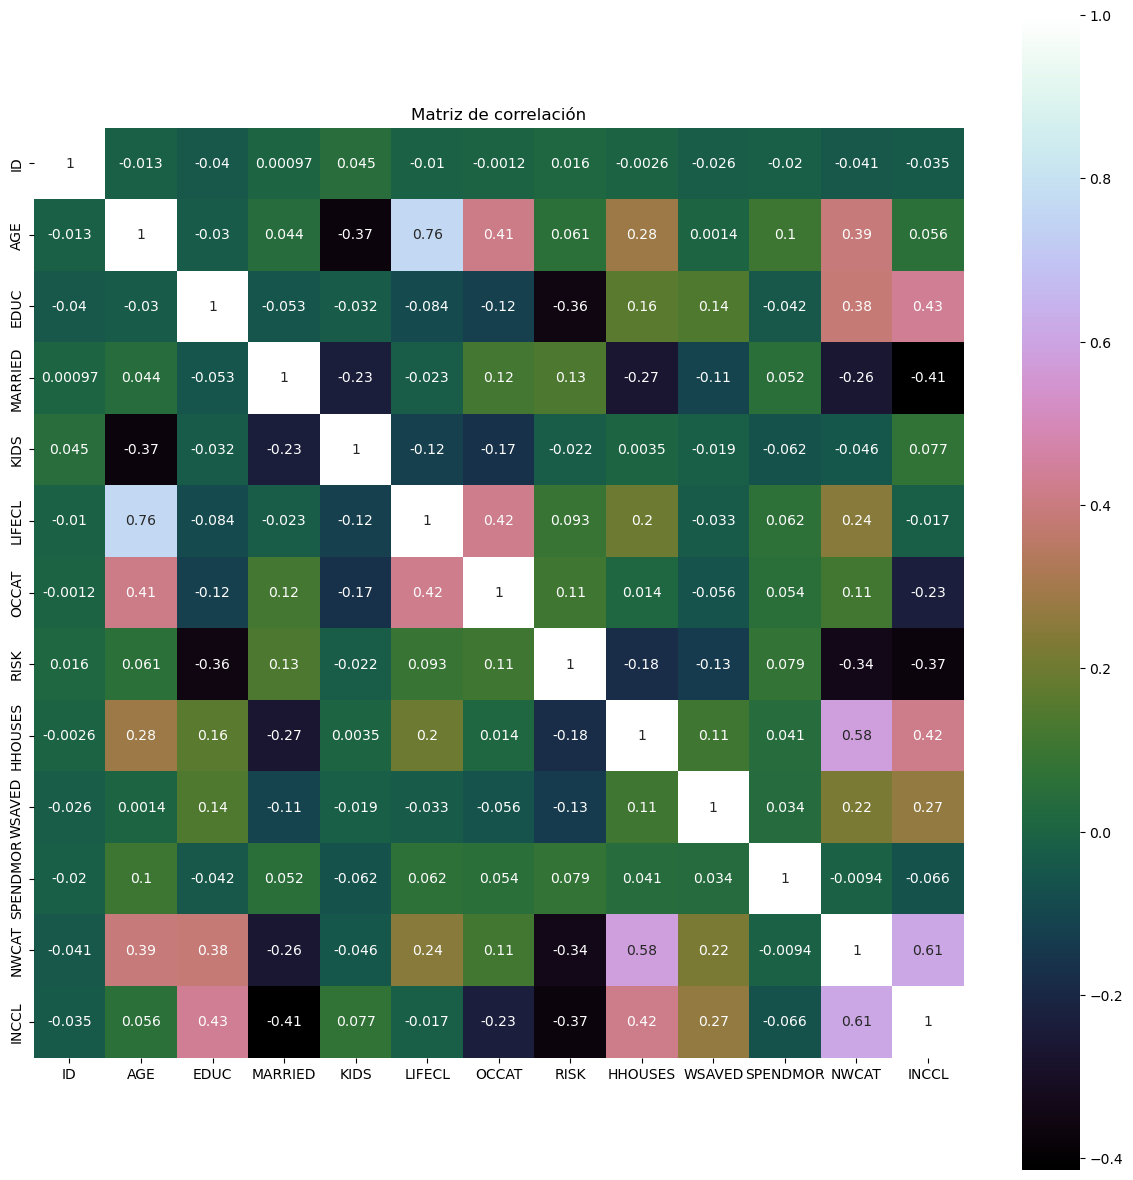

In [8]:
# correlación
correlation = dataset.corr()
plt.figure(figsize = (15,15))
plt.title('Matriz de correlación')
sns.heatmap(correlation
            , vmax = 1
            , square = True
            , annot = True
            , cmap = 'cubehelix'
           )

Como puede verse en la imagen de arriba, existe una correlación positiva significativa entre las acciones.

<a id='3'></a>
## 4. Preparación de datos

<a id='3.1'></a>
## 4.1. Limpieza de datos
Comprobemos las NA en las filas, eliminémoslas o rellénelas con la media de la columna.

In [9]:
#Comprobación de valores nulos
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Dado que no faltan datos y que los datos ya están en formato categórico, no se realizó más limpieza de datos. La columna ID que no es necesaria se elimina

In [10]:
# se creará un nuevo objeto con una copia de los datos e índices del objeto que realiza la llamada
X=dataset.copy(deep=True)
X=X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


<a id='3.2'></a>
## 4.2. Transformación de datos

Los datos disponibles se componen de atributos con escala similar. Por lo tanto, no se requiere ninguna transformación de datos.

<a id='4'></a>
# 5. Evaluar algoritmos y modelos

En este paso, veremos los siguientes modelos y realizaremos más análisis y visualización.

1. K-means
2. Affinity Propagation

<a id='5.1'></a>
## 5.1. K-Means Clustering

En este paso analizamos las siguientes métricas para obtener el número óptimo de clústeres.

1. Suma de errores cuadráticos (SSE) dentro de los conglomerados
2. Puntaje de siluet (Silhouette score)..

<a id='5.1.1'></a>
### 5.1.1. Encontrar el número correcto de grupos

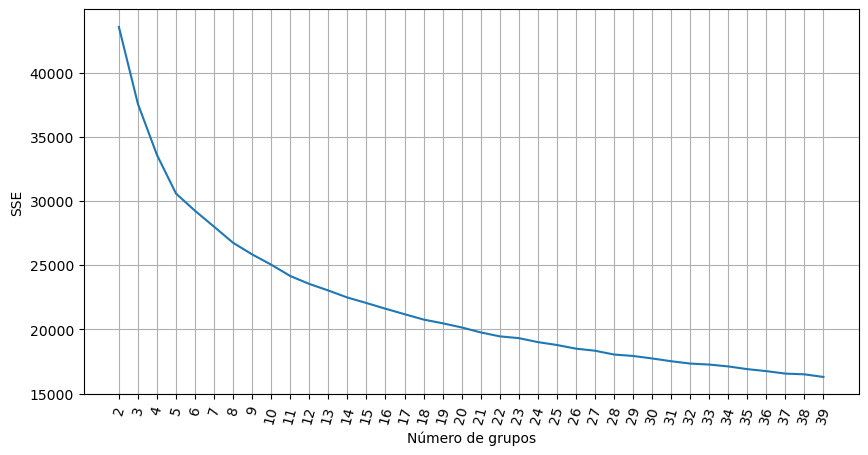

In [11]:
distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Número de grupos")
plt.ylabel("SSE")
plt.grid(True)

#### Silhouette score

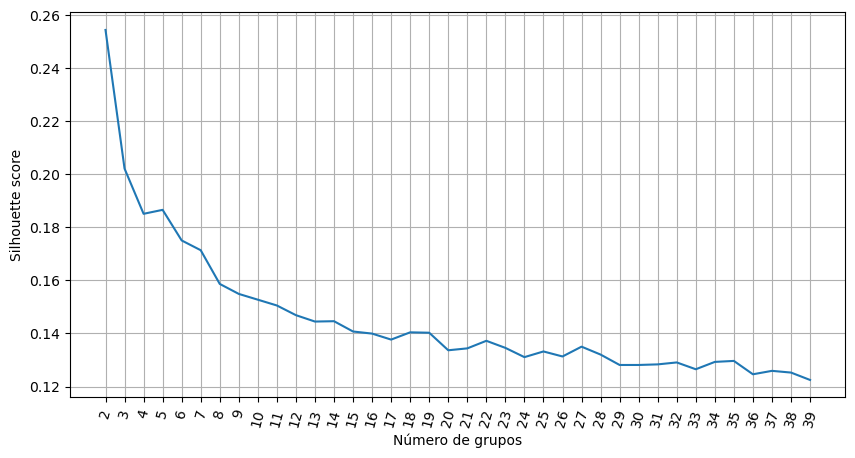

In [12]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Número de grupos")
plt.ylabel("Silhouette score")
plt.grid(True)

Al observar los gráficos anteriores, el número óptimo de conglomerados parece ser alrededor de 7. Podemos ver que a medida que el número de conglomerados aumenta hasta pasar 6, la suma de los cuadrados de los errores dentro de los conglomerados se estabiliza. En el segundo gráfico, podemos ver que hay varias partes del gráfico donde se puede ver un problema. Dado que no hay mucha diferencia en SSE después de 7 grupos, usaríamos 7 grupos en el modelo de k-medias siguiente.

<a id='5.1.2'></a>
### 5.1.2. Clusterización y visualización

In [13]:
nclust=7

In [14]:
# entrenar el modelo
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=7)

In [15]:
# Extrayendo etiquetas
target_labels = k_means.predict(X)

<a id='5.2'></a>
## 5.2. Agrupación de propagación por afinidad

In [16]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

In [17]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Número estimado de grupos: %d' % n_clusters_)

Estimated number of clusters: 161


<a id='5.3'></a>
## 5.3. Evaluación de clusters

Evaluamos los grupos utilizando el coeficiente de silueta (sklearn.metrics.silhouette_score). Una puntuación más alta del coeficiente de silueta significa un modelo con grupos mejor definidos.

In [18]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.16366010017367394
ap 0.09645938381101317


k-means tiene un coeficiente de silueta mucho más alto en comparación con la propagación por afinidad.

<a id='6'></a>
# 6. Intuición de grupo
En el siguiente paso, comprobaremos cada grupo y comprenderemos la intuición detrás de cada grupo.

In [19]:
cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
output=cluster_output.groupby('cluster').mean()
output

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,
0,1.925000,2.512500,1.240000,2.027500,3.227500,1.402500,3.202500,0.567500,2.257500,1.860000,1.930000,3.392500
1,4.876481,2.079526,1.593909,0.191201,5.654822,2.431472,3.582064,0.683587,2.240271,3.932318,2.262267,2.588832
2,2.451031,3.550258,1.137887,1.578608,2.747423,1.445876,2.481959,0.942010,2.716495,3.581186,4.231959,4.715206
3,4.601093,3.486339,1.243169,0.366120,5.325137,2.049180,2.713115,0.931694,2.568306,2.081967,4.418033,4.508197
4,1.966154,2.893846,1.618462,0.001538,1.383077,1.515385,3.147692,0.458462,2.407692,3.567692,1.943077,3.104615
5,1.900178,2.388592,1.344029,2.099822,3.365419,1.440285,3.406417,0.490196,2.213904,4.404635,1.691622,3.053476
6,4.657088,3.352490,1.245211,0.312261,5.346743,2.049808,2.854406,0.946360,2.632184,4.536398,4.375479,4.342912


### Demographics Features

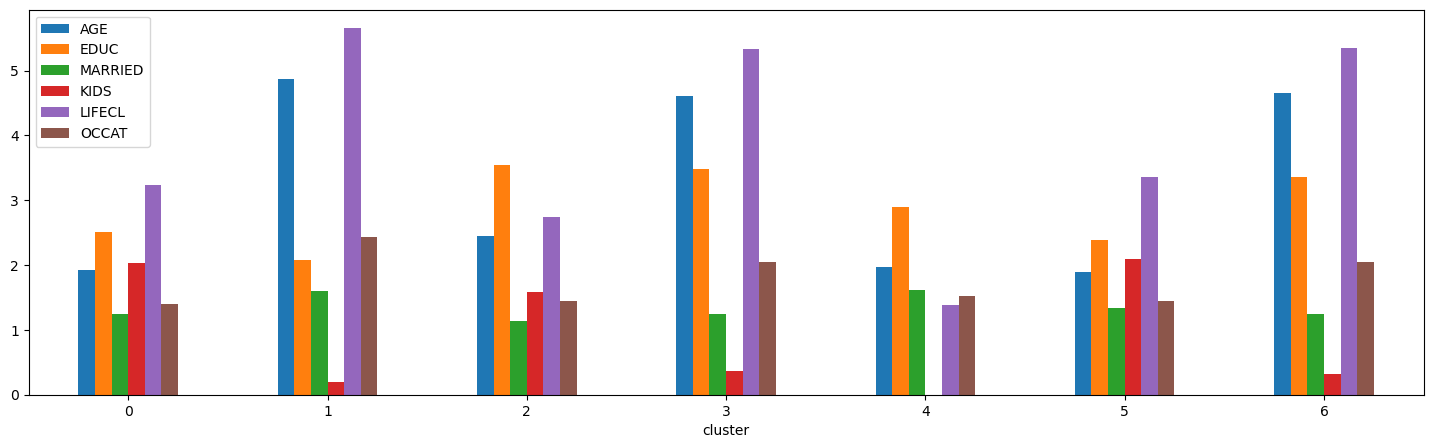

In [20]:
output[['AGE','EDUC','MARRIED','KIDS','LIFECL','OCCAT']].plot.bar(rot=0, figsize=(18,5));

El gráfico aquí muestra el valor promedio de los atributos para cada uno de los grupos. Por ejemplo, al comparar el grupo 0 y el grupo 1, el grupo 0 tiene una edad promedio más baja, pero un nivel de educación promedio más alto. En términos de matrimonio y número de hijos, estos dos grupos son similares. Por lo tanto, los individuos del grupo 0 tendrán, en promedio, una mayor tolerancia al riesgo en comparación con los individuos del grupo 1, según los atributos demográficos.

### Características financieras y características relacionadas con la disposición a asumir riesgos

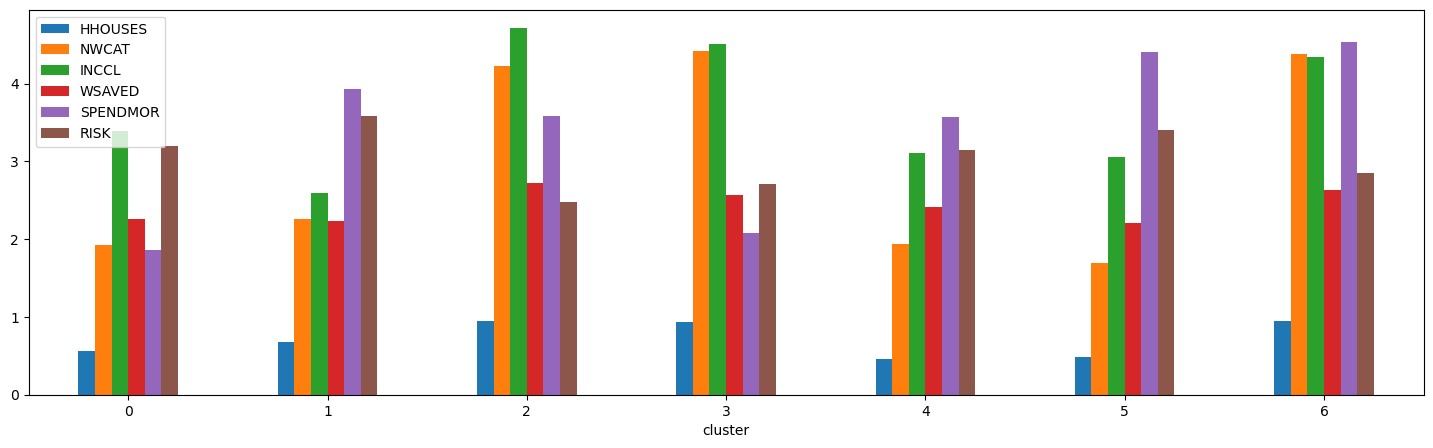

In [21]:
output[['HHOUSES','NWCAT','INCCL','WSAVED','SPENDMOR','RISK']].plot.bar(rot=0, figsize=(18,5));

El gráfico aquí muestra el valor promedio de los atributos para cada uno de los grupos en los atributos financieros y de comportamiento. Por ejemplo, al comparar el grupo 0 y el grupo 1, el grupo 0 tiene un promedio más alto de propiedad de vivienda, un valor neto y un ingreso promedio más altos y una menor disposición a asumir riesgos. En términos de comparación entre ahorro e ingreso y voluntad de ahorrar, los dos grupos son comparables. Por lo tanto, podemos postular que los individuos del grupo 0 tendrán, en promedio, una mayor capacidad, aunque menor disposición, para asumir riesgos en comparación con el grupo 1.

<Axes: xlabel='cluster'>

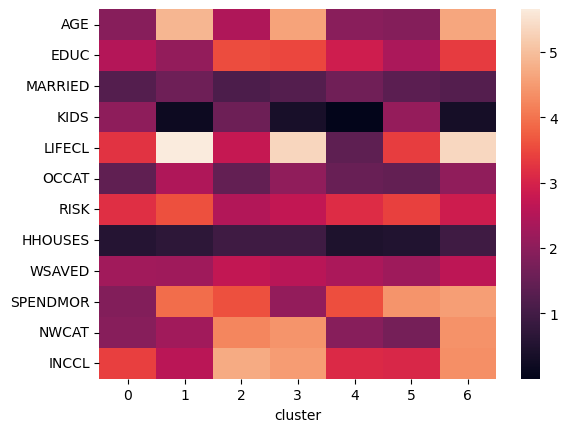

In [22]:
sns.heatmap(output.T)

Al combinar la información de los atributos demográficos, financieros y de comportamiento para el grupo 0 y el grupo 1, la capacidad general de asumir riesgos para el grupo 0 individual es mayor en comparación con el grupo 1. Al realizar un análisis similar en todos los demás grupos, resumimos los resultados en la mesa de abajo. La columna de tolerancia al riesgo representa la evaluación subjetiva de la tolerancia al riesgo de cada uno de los grupos.

| Cluster| Features | Risk Capacity |
| --- | --- | --- |
| Cluster 0	 | Edad baja, patrimonio e ingresos elevados, categoría de vida menos riesgosa, disposición a gastar más | Alto |
| Cluster 1	 | Alta edad, bajo patrimonio neto e ingresos, categoría de vida de alto riesgo, disposición a asumir riesgos, baja educación | Alto |
| Cluster 2	 | Edad alta, patrimonio e ingresos elevados, categoría de vida de alto riesgo, disposición a asumir riesgos, casa propia | Medio |
| Cluster 3	 | 	Baja edad, ingresos y patrimonio neto muy bajos, alta disposición a asumir riesgos, muchos niños | Bajo |
| Cluster 4	 | Edad media, ingresos y patrimonio neto muy altos, alta disposición a asumir riesgos, muchos hijos, casa propia | Alto |
| Cluster 5	 | Baja edad, ingresos y patrimonio neto muy bajos, alta disposición a asumir riesgos, sin hijos | Medio |
| Cluster 6	 | Edad baja, ingresos y patrimonio neto medios, alta disposición a asumir riesgos, muchos hijos, casa propia | Bajo |


**_Conclusion_**

Una de las conclusiones clave de este estudio de caso es el enfoque para comprender la intuición de los grupos. Utilizamos técnicas de visualización para comprender el comportamiento esperado de un miembro del grupo mediante la interpretación cualitativa de los valores medios de las variables en cada grupo.

Demostramos la eficiencia de la técnica de clustering para descubrir los grupos intuitivos naturales de diferentes inversores en función de su tolerancia al riesgo.

Dado que los algoritmos de agrupación pueden agrupar con éxito a los inversores en función de diferentes factores, como la edad, los ingresos y la tolerancia al riesgo, pueden mejorar aún más
utilizado por los administradores de cartera para comprender el comportamiento del inversor y estandarizar la asignación y el reequilibrio de la cartera entre los grupos, haciendo que el proceso de gestión de inversiones sea más rápido y eficaz.